# Analyzing Training, Validation, and Testing Sets

Investigation of the dataset for new reflector short tank data

In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import sys
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from exploratory_data_analysis_utils import *

# Load Data From H5

In [5]:
# Import test events from h5 file
data_path = "/fast_scratch/WatChMaL/data/IWCD_mPMT_Short/tts_egamma/IWCD_mPMT_Short_eg_1p5ns.h5"
data_file = h5py.File(data_path, "r")

print(data_file.keys())

hdf5_hit_pmt    = data_file["hit_pmt"]
hdf5_hit_time   = data_file["hit_time"]
hdf5_hit_charge = data_file["hit_charge"]


hit_pmt    = np.memmap(data_path, mode="r", shape=hdf5_hit_pmt.shape,
                                    offset=hdf5_hit_pmt.id.get_offset(), dtype=hdf5_hit_pmt.dtype)

hit_time   = np.memmap(data_path, mode="r", shape=hdf5_hit_time.shape,
                                    offset=hdf5_hit_time.id.get_offset(), dtype=hdf5_hit_time.dtype)

hit_charge = np.memmap(data_path, mode="r", shape=hdf5_hit_charge.shape,
                                    offset=hdf5_hit_charge.id.get_offset(), dtype=hdf5_hit_charge.dtype)

angles     = np.array(data_file['angles'])
energies   = np.array(data_file['energies'])
positions  = np.array(data_file['positions'])
labels     = np.array(data_file['labels'])
root_files = np.array(data_file['root_files'])

<KeysViewHDF5 ['angles', 'energies', 'event_hits_index', 'event_ids', 'hit_charge', 'hit_pmt', 'hit_time', 'labels', 'positions', 'root_files', 'veto', 'veto2']>


In [78]:
events_hit_index = data_file['event_hits_index']

In [7]:
print(type(events_hit_index))

<class 'h5py._hl.dataset.Dataset'>


In [8]:
print(events_hit_index.shape)

(17683099,)


In [9]:
print(len(events_hit_index))

17683099


In [10]:
print(hit_charge.shape)

(23989462754,)


In [11]:
print(len(hit_charge))

23989462754


In [12]:
print(events_hit_index[-1])

23989458989


In [13]:
print(len(hit_charge) - events_hit_index[-1])

3765


In [14]:
idxs = list(range(500, 1000))

In [15]:
print(events_hit_index[idxs])

[ 642898  644300  644704  645574  648286  649775  653594  654922  656131
  656748  657689  660236  663059  664620  666326  668714  670106  672523
  674348  676484  677812  678991  680098  680510  680964  681484  683413
  684845  685300  687703  687777  691579  691984  693469  693678  694044
  695414  695863  697421  697793  700496  701024  701768  704629  704738
  705301  706297  706606  707397  708011  709969  711534  713400  714038
  716201  716459  718045  718779  720648  721380  722137  723200  723803
  724749  726791  729463  729523  731029  732813  734667  735146  736784
  737327  737426  738701  739103  740531  741585  741858  742246  743598
  745443  745920  746202  746393  748486  749289  749528  750363  753501
  753737  754137  755657  755764  755827  757871  759730  760904  762285
  762898  763451  763713  764316  766935  768619  768678  768861  769400
  771180  772064  772189  773659  774541  776812  777182  777296  777770
  780175  781712  782348  782597  782749  783135  7

In [16]:
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

# Load Indices

In [17]:
idxs_path = '/fast_scratch/WatChMaL/data/IWCD_mPMT_Short/tts_egamma/IWCD_mPMT_Short_eg_1p5ns_idxs.npz'
idxs = np.load(idxs_path, allow_pickle=True)

train_idxs = idxs['train_idxs']
val_idxs   = idxs['val_idxs']
test_idxs  = idxs['test_idxs']

# compute and save event radii

In [18]:
# compute and save event radii

radii = np.sqrt(positions[:,0,0]**2 + positions[:,0,2]**2)

np.savez('event_radii.npz', radii=radii)


In [19]:
radii_data = np.load('event_radii.npz', allow_pickle=True)

radii = radii_data['radii']

# Get indices associated with each dataset and particle type

In [20]:
train_g_idxs = train_idxs[np.where(labels[train_idxs]==0)[0]]
val_g_idxs   = val_idxs[np.where(labels[val_idxs]==0)[0]]
test_g_idxs  = test_idxs[np.where(labels[test_idxs]==0)[0]]
train_e_idxs = train_idxs[np.where(labels[train_idxs]==1)[0]]
val_e_idxs   = val_idxs[np.where(labels[val_idxs]==1)[0]]
test_e_idxs  = test_idxs[np.where(labels[test_idxs]==1)[0]]

# Distribution of event energies by dataset and particle type

In [21]:
# get energies
train_e_energies = energies[train_e_idxs]
val_e_energies   = energies[val_e_idxs]
test_e_energies  = energies[test_e_idxs]

e_energies = np.concatenate((train_e_energies, val_e_energies, test_e_energies))

train_g_energies = energies[train_g_idxs]
val_g_energies   = energies[val_g_idxs]
test_g_energies  = energies[test_g_idxs]

g_energies = np.concatenate((train_g_energies, val_g_energies, test_g_energies))

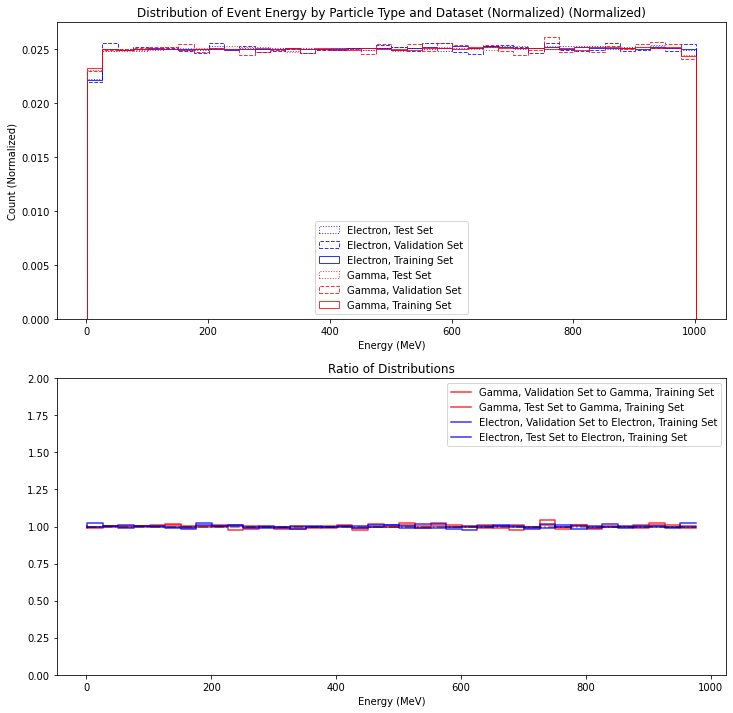

In [22]:
fig = plot_compare_dists([np.squeeze(train_e_energies), np.squeeze(val_e_energies), np.squeeze(test_e_energies), 
                          np.squeeze(train_g_energies), np.squeeze(val_g_energies), np.squeeze(test_g_energies)],
                         numerator_dist_idxs   = [1, 2, 4, 5],
                         denominator_dist_idxs = [0, 0, 3, 3],
                         bins=40,
                         labels=[
                                  'Gamma, Training Set', 'Gamma, Validation Set', 'Gamma, Test Set',
                                  'Electron, Training Set', 'Electron, Validation Set', 'Electron, Test Set'],
                         ratio_range=[0,2],
                         title='Distribution of Event Energy by Particle Type and Dataset (Normalized)', 
                         colors =  ['r','r','r','b','b','b'],
                         linestyle=['-','--',':','-','--',':'], 
                         xlabel='Energy (MeV)',
                         loc='lower center'
                    )

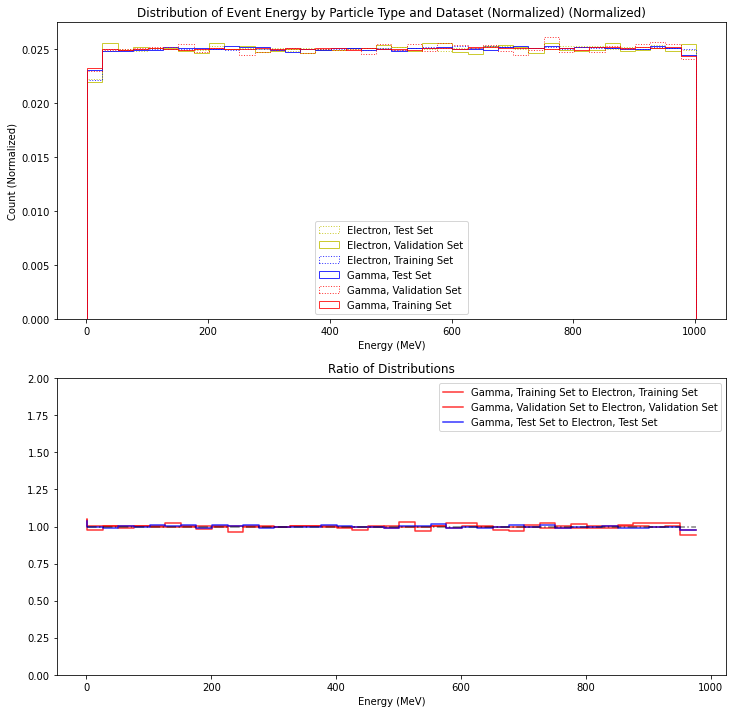

In [55]:
fig = plot_compare_dists([np.squeeze(train_e_energies), np.squeeze(val_e_energies), np.squeeze(test_e_energies), 
                          np.squeeze(train_g_energies), np.squeeze(val_g_energies), np.squeeze(test_g_energies)],
                         numerator_dist_idxs   = [0, 1, 2],
                         denominator_dist_idxs = [3, 4, 5],
                         bins=40,
                         labels=[
                                  'Gamma, Training Set', 'Gamma, Validation Set', 'Gamma, Test Set',
                                  'Electron, Training Set', 'Electron, Validation Set', 'Electron, Test Set'],
                         ratio_range=[0,2],
                         title='Distribution of Event Energy by Particle Type and Dataset (Normalized)', 
                         colors =  ['r','r','b','b','y','y'],
                         linestyle=['-',':','-',':','-',':'], 
                         xlabel='Energy (MeV)',
                         loc='lower center'
                    )

# Distribution of event energies by dataset and particle type relative to threshold

In [23]:
GAMMA_THRESHOLD = 1.55
ELECTRON_THRESHOLD = 0.775
MUON_THRESHOLD = 160.26

In [25]:
#shifted_energies = energies - np.choose(labels, [GAMMA_THRESHOLD, ELECTRON_THRESHOLD])
shifted_energies = np.copy(energies)
shifted_energies[labels==0] -= GAMMA_THRESHOLD
shifted_energies[labels==1] -= ELECTRON_THRESHOLD

In [26]:
# get shifted energies
shifted_train_g_energies = shifted_energies[train_g_idxs]
shifted_val_g_energies   = shifted_energies[val_g_idxs]
shifted_test_g_energies  = shifted_energies[test_g_idxs]

shifted_g_energies = np.concatenate((shifted_train_g_energies, shifted_val_g_energies, shifted_test_g_energies))

shifted_train_e_energies = shifted_energies[train_e_idxs]
shifted_val_e_energies   = shifted_energies[val_e_idxs]
shifted_test_e_energies  = shifted_energies[test_e_idxs]

shifted_e_energies = np.concatenate((shifted_train_e_energies, shifted_val_e_energies, shifted_test_e_energies))


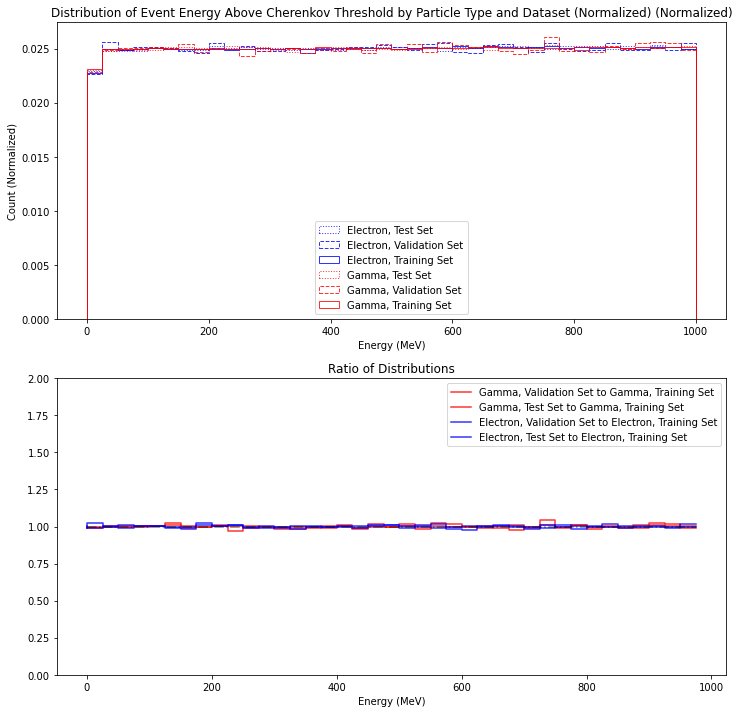

In [27]:
fig = plot_compare_dists([np.squeeze(shifted_train_e_energies), np.squeeze(shifted_val_e_energies), np.squeeze(shifted_test_e_energies), 
                          np.squeeze(shifted_train_g_energies), np.squeeze(shifted_val_g_energies), np.squeeze(shifted_test_g_energies)],
                          numerator_dist_idxs   = [1, 2, 4, 5],
                          denominator_dist_idxs = [0, 0, 3, 3],
                          bins=40,
                          labels=[
                                 'Gamma, Training Set', 'Gamma, Validation Set', 'Gamma, Test Set',
                                 'Electron, Training Set', 'Electron, Validation Set', 'Electron, Test Set'],
                          ratio_range=[0,2],
                          title='Distribution of Event Energy Above Cherenkov Threshold by Particle Type and Dataset (Normalized)',
                          colors=['r','r','r','b','b','b'],
                          linestyle=['-','--',':','-','--',':'], xlabel='Energy (MeV)',
                          loc='lower center'
                    )

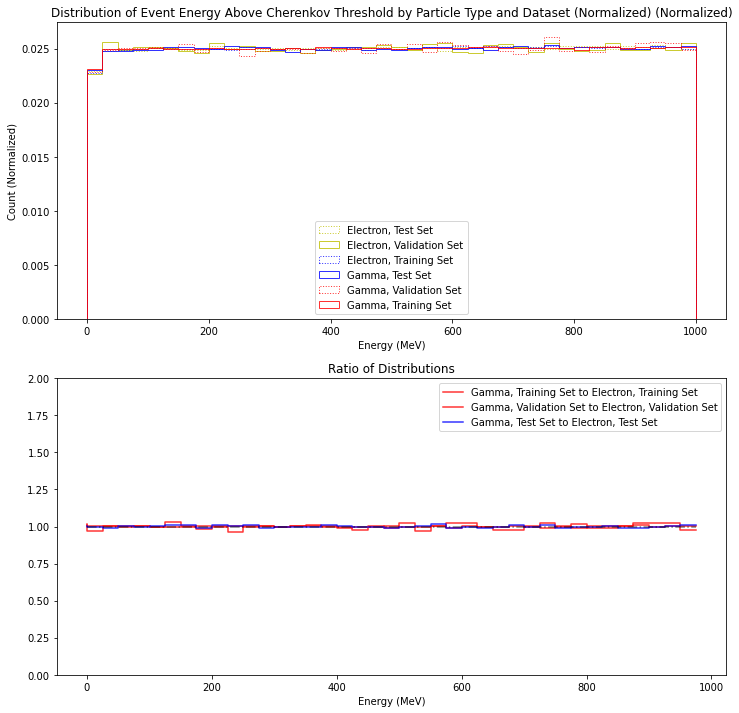

In [54]:
fig = plot_compare_dists([np.squeeze(shifted_train_e_energies), np.squeeze(shifted_val_e_energies), np.squeeze(shifted_test_e_energies), 
                          np.squeeze(shifted_train_g_energies), np.squeeze(shifted_val_g_energies), np.squeeze(shifted_test_g_energies)],
                          numerator_dist_idxs   = [0, 1, 2],
                          denominator_dist_idxs = [3, 4, 5],
                          bins=40,
                          labels=[
                                 'Gamma, Training Set', 'Gamma, Validation Set', 'Gamma, Test Set',
                                 'Electron, Training Set', 'Electron, Validation Set', 'Electron, Test Set'],
                          ratio_range=[0,2],
                          title='Distribution of Event Energy Above Cherenkov Threshold by Particle Type and Dataset (Normalized)',
                          colors=['r','r','b','b','y','y'],
                          linestyle=['-',':','-',':','-',':'], xlabel='Energy (MeV)',
                          loc='lower center'
                    )

# Distribution of event departure angles

In [30]:
splits = {
    'Electron, Train Set': train_e_idxs,
    'Electron, Validation Set': val_e_idxs,
    'Electron, Test Set': test_e_idxs,
    'Gamma, Train Set': train_g_idxs,
    'Gamma, Validation Set': val_g_idxs,
    'Gamma, Test Set': test_g_idxs,
}

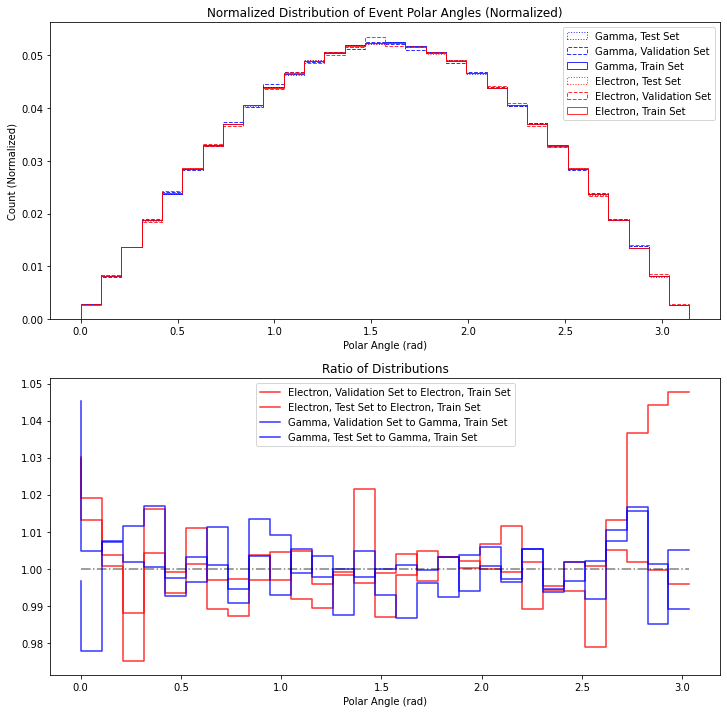

In [36]:
fig = plot_compare_dists([angles[s,0] for s in splits.values()],
                         [1,2,4,5],
                         [0,0,3,3],
                         list(splits.keys()),
                         bins=30,
                         title='Normalized Distribution of Event Polar Angles',
                         xlabel='Polar Angle (rad)',
                         colors=['r','r','r','b','b','b'],
                         linestyle=['-','--',':','-','--',':'])

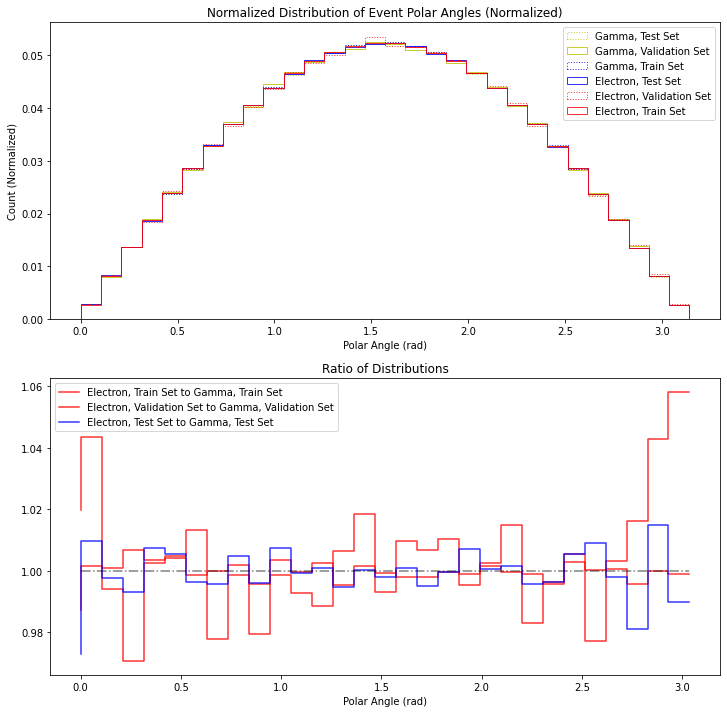

In [53]:
fig = plot_compare_dists([angles[s,0] for s in splits.values()],
                         [0,1,2],
                         [3,4,5],
                         list(splits.keys()),
                         bins=30,
                         title='Normalized Distribution of Event Polar Angles',
                         xlabel='Polar Angle (rad)',
                         colors=['r','r','b','b','y','y'],
                         linestyle=['-',':','-',':','-',':'])

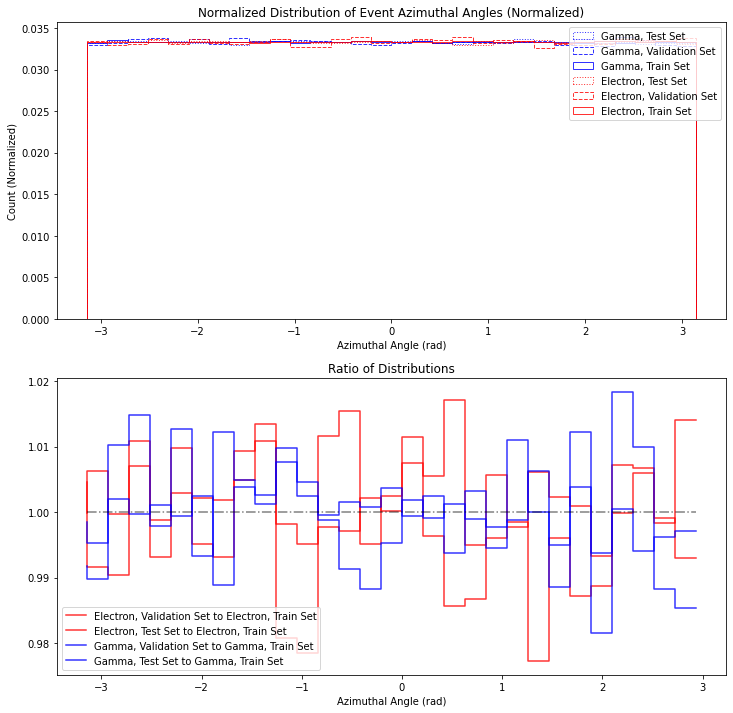

In [39]:
fig = plot_compare_dists([angles[s,1] for s in splits.values()],
                         [1,2,4,5],
                         [0,0,3,3],
                         list(splits.keys()),
                         bins=30,
                         title='Normalized Distribution of Event Azimuthal Angles',
                         xlabel='Azimuthal Angle (rad)',
                         colors=['r','r','r','b','b','b'],
                         linestyle=['-','--',':','-','--',':'])

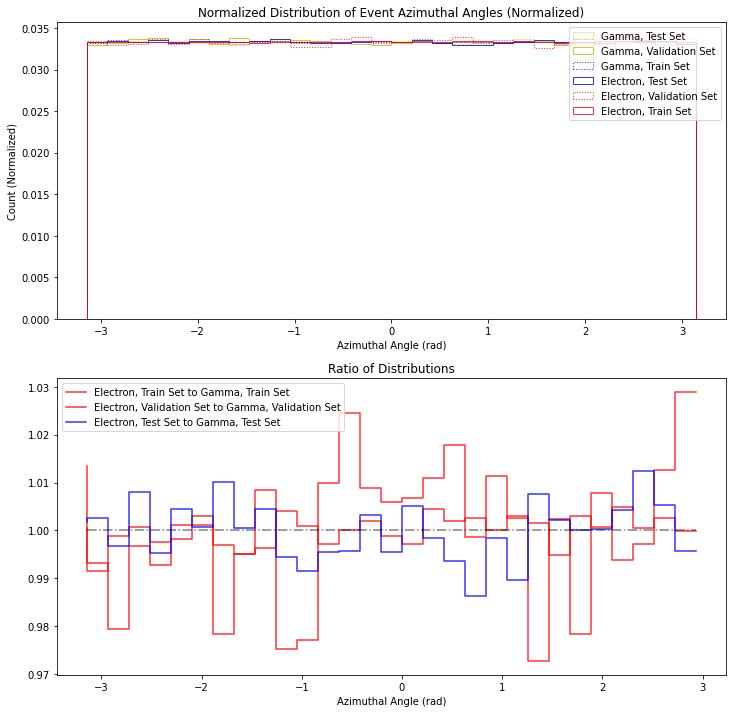

In [52]:
fig = plot_compare_dists([angles[s,1] for s in splits.values()],
                         [0,1,2],
                         [3,4,5],
                         list(splits.keys()),
                         bins=30,
                         title='Normalized Distribution of Event Azimuthal Angles',
                         xlabel='Azimuthal Angle (rad)',
                         colors=['r','r','b','b','y','y'],
                         linestyle=['-',':','-',':','-',':'])

<Figure size 432x288 with 0 Axes>

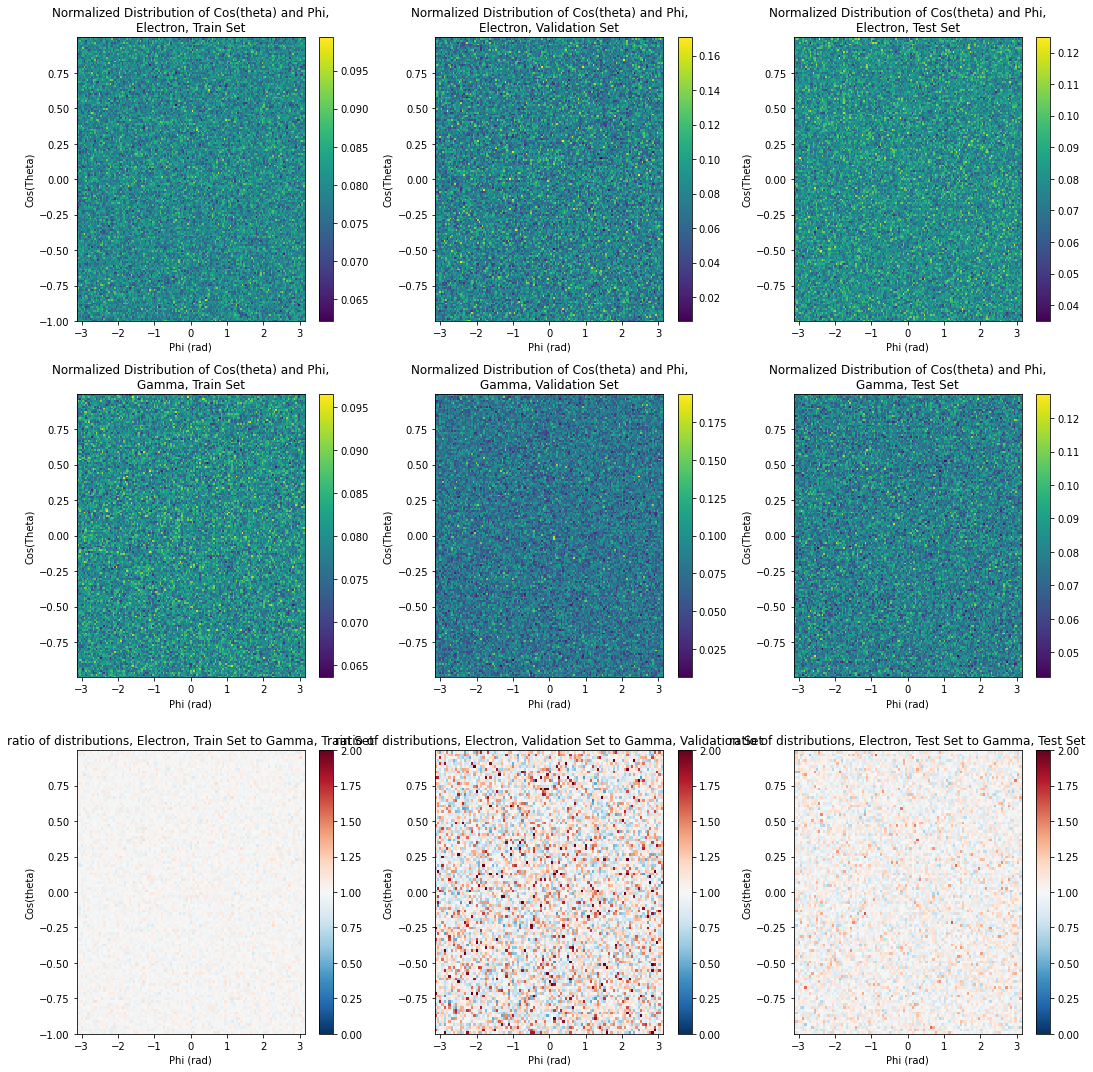

In [68]:
plt.figure()
fig,axes = plt.subplots(3,3,figsize=(15,15))
axes = axes.flatten()

for i, (k, s) in enumerate(splits.items()):
    ax = axes[i]
    mat,_,_,im = ax.hist2d(angles[s,1], np.cos(angles[s,0]),[150,150],density=True)
    fig.colorbar(im,ax=ax)
    ax.set_title('Normalized Distribution of Cos(theta) and Phi,\n{}'.format(k))
    ax.set_ylabel('Cos(Theta)')
    ax.set_xlabel('Phi (rad)')
for i, ((k1, s1), (k2,s2)) in enumerate(zip(list(splits.items())[:3], list(splits.items())[3:])):
    fig = plot_2d_ratio(angles[s1,1], np.cos(angles[s1,0]),
                        angles[s2,1], np.cos(angles[s2,0]),bins=(100,100),
                        title=f"ratio of distributions, {k1} to {k2}",
                        ylabel='Cos(theta)',xlabel='Phi (rad)',
                        fig=fig, ax=axes[6+i],ratio_range=[0,2])
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

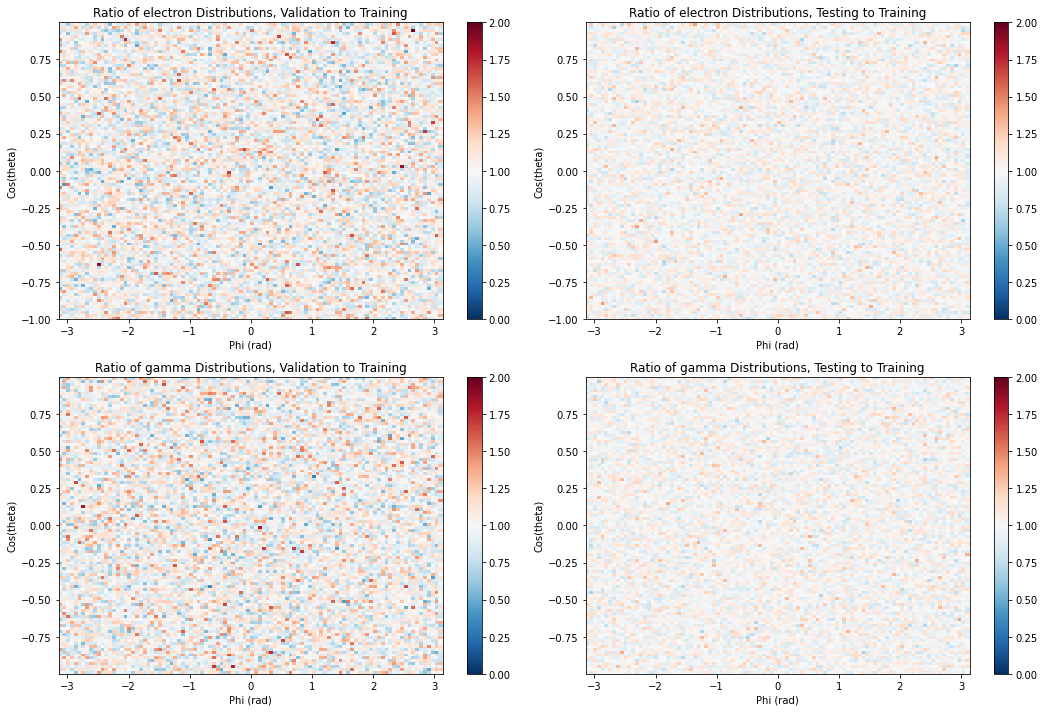

In [44]:
plt.figure()
fig,axes = plt.subplots(2,2,figsize=(15,10))
axes = axes.flatten()

fig = plot_2d_ratio(angles[val_e_idxs,1], np.cos(angles[val_e_idxs,0]),
                    angles[train_e_idxs,1], np.cos(angles[train_e_idxs,0]),bins=(100,100),
                    title='Ratio of electron Distributions, Validation to Training',
                    ylabel='Cos(theta)',xlabel='Phi (rad)',
                    fig=fig, ax=axes[0],ratio_range=[0,2])
fig = plot_2d_ratio(angles[test_e_idxs,1], np.cos(angles[test_e_idxs,0]),
                    angles[train_e_idxs,1], np.cos(angles[train_e_idxs,0]),bins=(100,100),
                    title='Ratio of electron Distributions, Testing to Training',ylabel='Cos(theta)',xlabel='Phi (rad)',
                    fig=fig, ax=axes[1],ratio_range=[0,2])
fig = plot_2d_ratio(angles[val_g_idxs,1], np.cos(angles[val_g_idxs,0]),
                    angles[train_g_idxs,1], np.cos(angles[train_g_idxs,0]),bins=(100,100),
                    title='Ratio of gamma Distributions, Validation to Training',
                    ylabel='Cos(theta)',xlabel='Phi (rad)',
                    fig=fig, ax=axes[2],ratio_range=[0,2])
fig = plot_2d_ratio(angles[test_g_idxs,1], np.cos(angles[test_g_idxs,0]),
                    angles[train_g_idxs,1], np.cos(angles[train_g_idxs,0]),bins=(100,100),
                    title='Ratio of gamma Distributions, Testing to Training',ylabel='Cos(theta)',xlabel='Phi (rad)',
                    fig=fig, ax=axes[3],ratio_range=[0,2])

plt.tight_layout()
plt.show()

# Distribution of events throughout the detector volume

<Figure size 432x288 with 0 Axes>

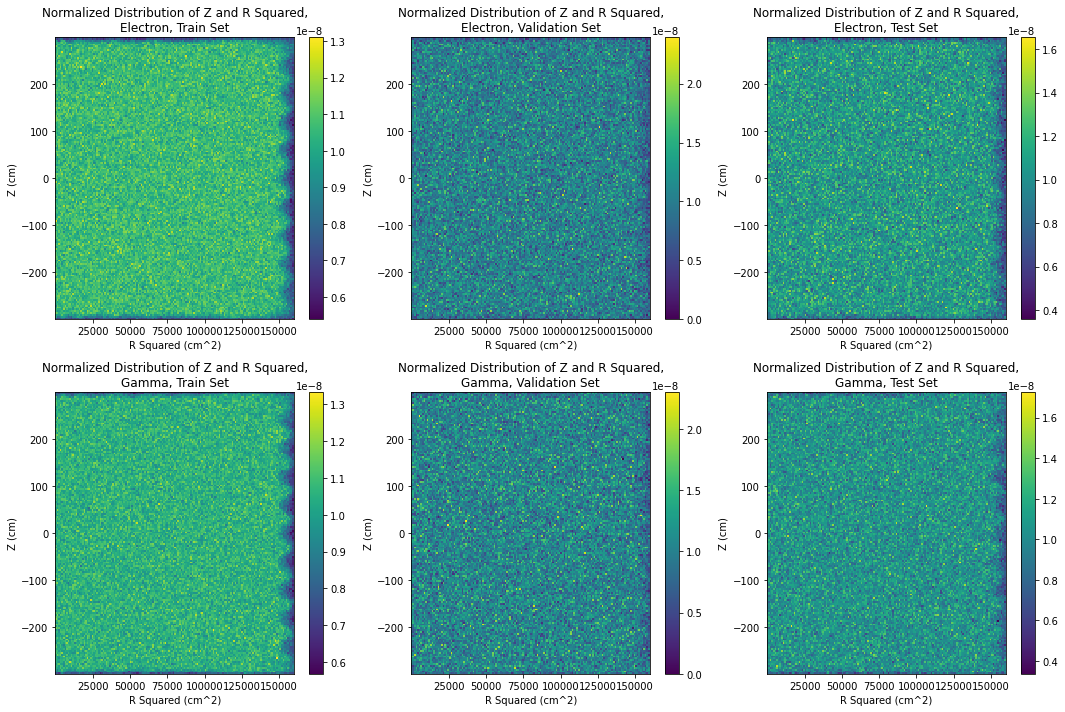

In [67]:
plt.figure()
fig,axes = plt.subplots(2,3,figsize=(15,10))

bins=(150,150)
for ax, (k, s) in zip(axes.flatten(), splits.items()):
    mat,_,_,im = ax.hist2d(radii[s]**2,positions[s,0,1],bins,density=True)
    fig.colorbar(im,ax=ax)
    ax.set_title('Normalized Distribution of Z and R Squared,\n{}'.format(k))
    ax.set_ylabel('Z (cm)')
    ax.set_xlabel('R Squared (cm^2)')
    
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

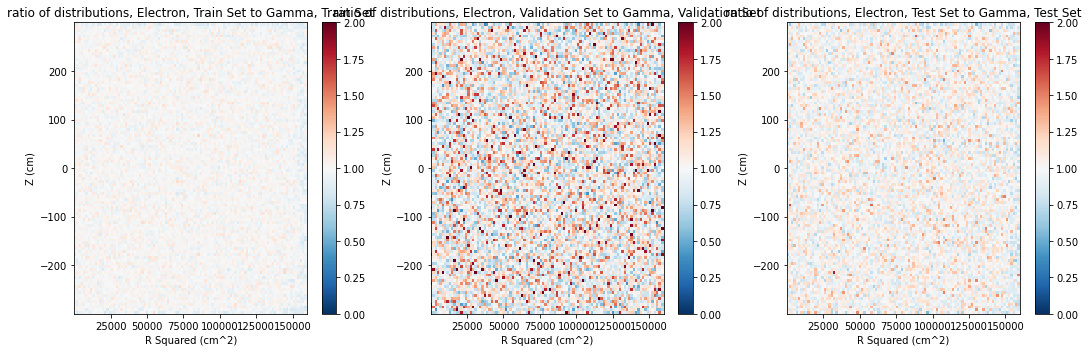

In [72]:
plt.figure()
fig,axes = plt.subplots(1,3,figsize=(15,5))

bins=(150,150)
for i, ((k1, s1), (k2,s2)) in enumerate(zip(list(splits.items())[:3], list(splits.items())[3:])):
    fig = plot_2d_ratio(radii[s1]**2, positions[s1,0,1],
                        radii[s2]**2, positions[s2,0,1],bins=(100,100),
                        title=f"ratio of distributions, {k1} to {k2}",
                        ylabel='Z (cm)',xlabel='R Squared (cm^2)',
                        fig=fig, ax=axes[i],ratio_range=[0,2])
    
plt.tight_layout()
plt.show()

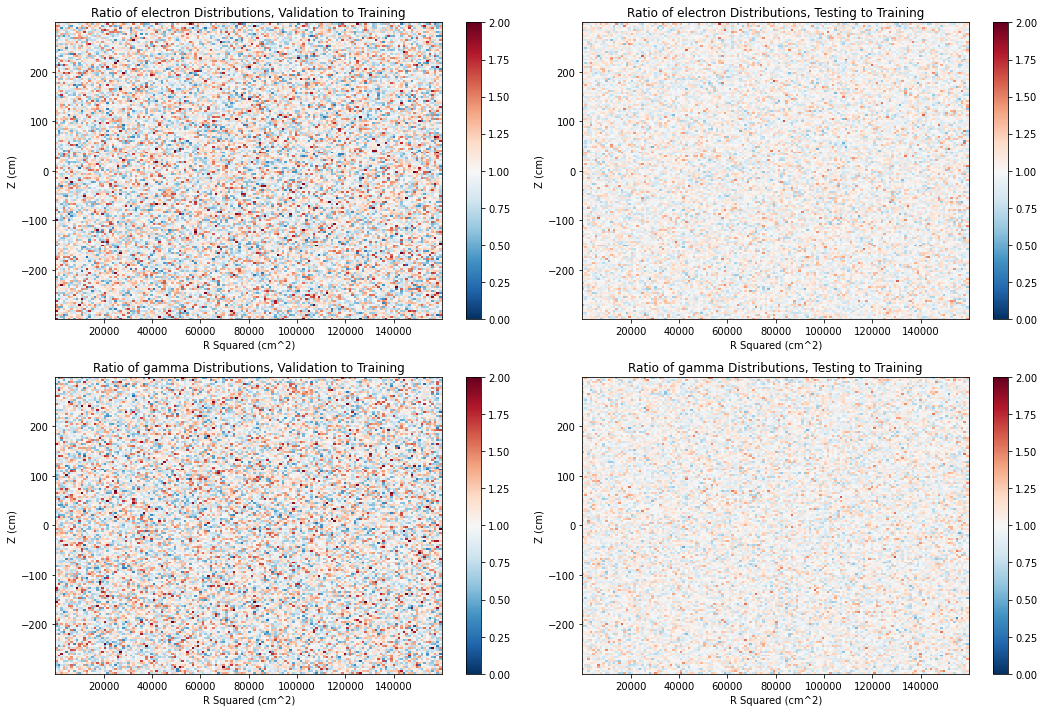

In [77]:
fig,axes = plt.subplots(2,2,figsize=(15,10))

bins=(150,150)
fig = plot_2d_ratio(radii[val_e_idxs]**2, positions[val_e_idxs,0,1],
                    radii[train_e_idxs]**2, positions[train_e_idxs,0,1],
                    bins=bins,
                    title='Ratio of electron Distributions, Validation to Training',xlabel='R Squared (cm^2)',ylabel='Z (cm)',
                    fig=fig, ax=axes[0,0],ratio_range=[0,2])

fig = plot_2d_ratio(radii[test_e_idxs]**2, positions[test_e_idxs,0,1],
                    radii[train_e_idxs]**2, positions[train_e_idxs,0,1],
                    bins=bins,
                    title='Ratio of electron Distributions, Testing to Training',xlabel='R Squared (cm^2)',ylabel='Z (cm)',
                    fig=fig, ax=axes[0,1],ratio_range=[0,2])

fig = plot_2d_ratio(radii[val_g_idxs]**2, positions[val_g_idxs,0,1],
                    radii[train_g_idxs]**2, positions[train_g_idxs,0,1],
                    bins=bins,
                    title='Ratio of gamma Distributions, Validation to Training',xlabel='R Squared (cm^2)',ylabel='Z (cm)',
                    fig=fig, ax=axes[1,0],ratio_range=[0,2])

fig = plot_2d_ratio(radii[test_g_idxs]**2, positions[test_g_idxs,0,1],
                    radii[train_g_idxs]**2, positions[train_g_idxs,0,1],
                    bins=bins,
                    title='Ratio of gamma Distributions, Testing to Training',xlabel='R Squared (cm^2)',ylabel='Z (cm)',
                    fig=fig, ax=axes[1,1],ratio_range=[0,2])

plt.tight_layout()